In [51]:
# Importing necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Libraries imported successfully")

Libraries imported successfully


In [52]:
# Loading first csv file "Credit_card.csv"
credit_card_data = pd.read_csv('Credit_card.csv')

# Showing the first few rows of the file
#print("Credit_card.csv:")
credit_card_data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [53]:
# Loading the second file "Credit_card_label.csv"
credit_card_label = pd.read_csv('Credit_card_label.csv')

# Showing the first few rows of the file
#print("\nCredit_card_label.csv:")
credit_card_label.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [54]:
# Merging the files/dataframes with common heading 'Ind_ID'
merged_data = pd.merge(credit_card_data, credit_card_label, on='Ind_ID')
print("Merge Successful")

Merge Successful


In [55]:
# Showing the the first few rows of the merged dataframe
merged_data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [56]:
print("\nThe last column 'label' is merged with the data now.")


The last column 'label' is merged with the data now.


In [57]:
# Checking the variable information

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [58]:
# Identify missing values
missing_values = merged_data.isnull().sum()

# Showing missing values for the specified columns
print("Missing Values:")
print(missing_values[['GENDER', 'Annual_income', 'Type_Occupation', 'Birthday_count']])

Missing Values:
GENDER               7
Annual_income       23
Type_Occupation    488
Birthday_count      22
dtype: int64


In [59]:
# Converting the negative 'Birthday Count' values to positive
merged_data['Birthday_count'] = merged_data['Birthday_count'].abs()

In [60]:
  # Check the summary statistics after converting to ensure there are no negative values
  print("Summary Statistics after Converting 'Birthday Count' to Positive:")
  print(merged_data['Birthday_count'].describe())

Summary Statistics after Converting 'Birthday Count' to Positive:
count     1526.000000
mean     16040.342071
std       4229.503202
min       7705.000000
25%      12417.000000
50%      15661.500000
75%      19553.000000
max      24946.000000
Name: Birthday_count, dtype: float64


In [61]:
# Calculating the mean and median for numerical columns
mean_annual_income = merged_data['Annual_income'].mean()
median_annual_income = merged_data['Annual_income'].median()

mean_birthday_count = merged_data['Birthday_count'].mean()
median_birthday_count = merged_data['Birthday_count'].median()

# Print the calculated values
print("Mean Annual Income:", mean_annual_income)
print("Median Annual Income:", median_annual_income)
print("\nMean Birthday Count:", mean_birthday_count)
print("Median Birthday Count:", median_birthday_count)


Mean Annual Income: 191399.3262295082
Median Annual Income: 166500.0

Mean Birthday Count: 16040.342070773264
Median Birthday Count: 15661.5


In [62]:
# Imputing the missing values
# For numerical columns like 'Annual_income' and 'Birthday_count', imputing values using median
merged_data['Annual_income'].fillna(merged_data['Annual_income'].median(), inplace=True)
merged_data['Birthday_count'].fillna(merged_data['Birthday_count'].median(), inplace=True)

# For categorical columns like 'GENDER' and 'Type_Occupation', using mode imputation
merged_data['GENDER'].fillna(merged_data['GENDER'].mode()[0], inplace=True)
merged_data['Type_Occupation'].fillna(merged_data['Type_Occupation'].mode()[0], inplace=True)

In [63]:
# Now verifying that missing values have been handled
print("\nMissing Values after Imputation:")
print(merged_data[['GENDER', 'Annual_income', 'Type_Occupation', 'Birthday_count']].isnull().sum())


Missing Values after Imputation:
GENDER             0
Annual_income      0
Type_Occupation    0
Birthday_count     0
dtype: int64


In [64]:
merged_data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,18772.0,365243,1,0,0,0,Laborers,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,13557.0,-586,1,1,1,0,Laborers,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,15661.5,-586,1,1,1,0,Laborers,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,13557.0,-586,1,1,1,0,Laborers,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,13557.0,-586,1,1,1,0,Laborers,2,1


In [65]:
merged_data.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [75]:
# Converting 'Birthday_count' to 'Age'
merged_data['Age'] = merged_data['Birthday_count'] // 365


In [76]:
# Treating the negative values in 'Employed_days' by converting them to positive
merged_data['Employed_days'] = merged_data['Employed_days'].abs()


In [77]:
# Creating a new column for 'Experience' in years
merged_data['Experience'] = merged_data['Employed_days'] // 365


In [78]:
# Showing the first few rows to verify the changes
print(merged_data[['Birthday_count', 'Age', 'Employed_days', 'Experience']].head())


   Birthday_count   Age  Employed_days  Experience
0         18772.0  51.0         365243        1000
1         13557.0  37.0            586           1
2         15661.5  42.0            586           1
3         13557.0  37.0            586           1
4         13557.0  37.0            586           1


In [79]:
merged_data.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
Age                0
Experience         0
dtype: int64

In [80]:
# Imputing missing values for 'GENDER' using the mode (most frequent value)
merged_data['GENDER'].fillna(merged_data['GENDER'].mode()[0], inplace=True)

# Imputing missing values for 'Annual_income' using the median
merged_data['Annual_income'].fillna(merged_data['Annual_income'].median(), inplace=True)

# Imputing missing values for 'Type_Occupation' using the mode (most frequent value)
merged_data['Type_Occupation'].fillna(merged_data['Type_Occupation'].mode()[0], inplace=True)

In [81]:
# Verify that missing values have been handled
print("Missing Values after Imputation:")
print(merged_data[['GENDER', 'Annual_income', 'Type_Occupation']].isnull().sum())

Missing Values after Imputation:
GENDER             0
Annual_income      0
Type_Occupation    0
dtype: int64


In [83]:
# Exporting the updated DataFrame to a new CSV file
merged_data.to_csv('updated_merged_data.csv', index=False)

print("Updated Merged Data exported to 'updated_merged_data.csv'")

Updated Merged Data exported to 'updated_merged_data.csv'


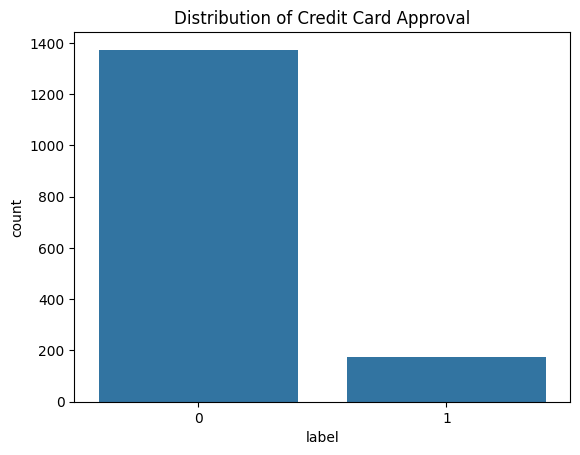

In [84]:
# Visualizing the distribution of the target variable 'label'
sns.countplot(x='label', data=merged_data)
plt.title('Distribution of Credit Card Approval')
plt.show()

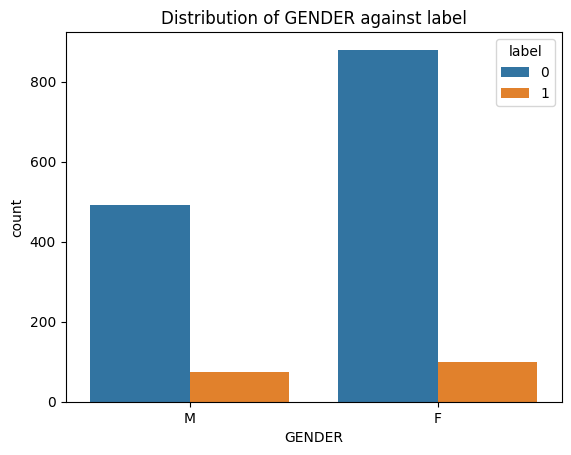

In [90]:
# Countplot for 'GENDER' against 'label'
sns.countplot(x='GENDER', hue='label', data=merged_data)
plt.title('Distribution of GENDER against label')
plt.show()

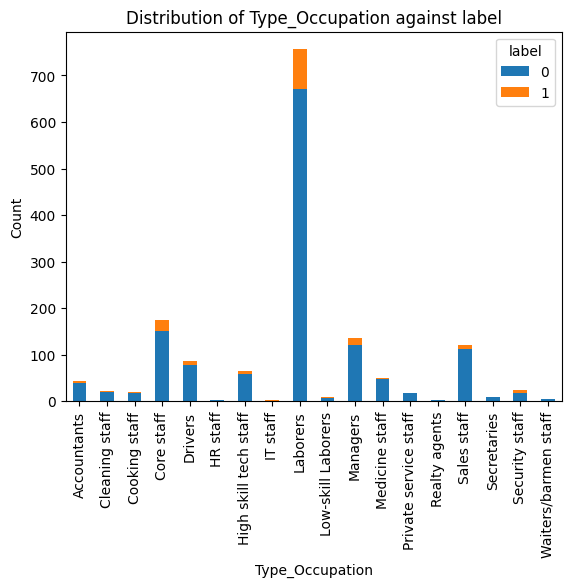

In [91]:
# Stacked bar chart for 'Type_Occupation' against 'label'
type_occ_count = pd.crosstab(merged_data['Type_Occupation'], merged_data['label'])

type_occ_count.plot(kind='bar', stacked=True)
plt.title('Distribution of Type_Occupation against label')
plt.xlabel('Type_Occupation')
plt.ylabel('Count')
plt.show()

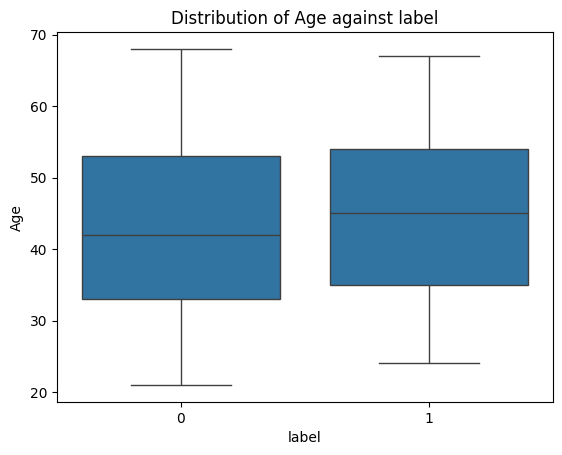

In [92]:
# Boxplot for 'Age' against 'label'
sns.boxplot(x='label', y='Age', data=merged_data)
plt.title('Distribution of Age against label')
plt.show()

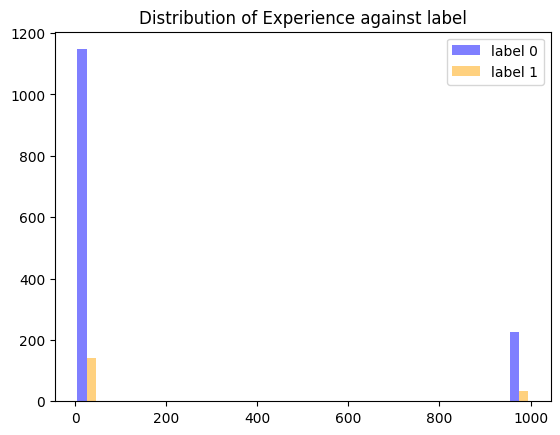

In [94]:
# Histogram for 'Experience' with different colors for each label
plt.hist([merged_data[merged_data['label'] == 0]['Experience'],
          merged_data[merged_data['label'] == 1]['Experience']],
          bins=20, color=['blue', 'orange'], alpha=0.5, label=['label 0', 'label 1'])
plt.title('Distribution of Experience against label')
plt.legend()
plt.show()

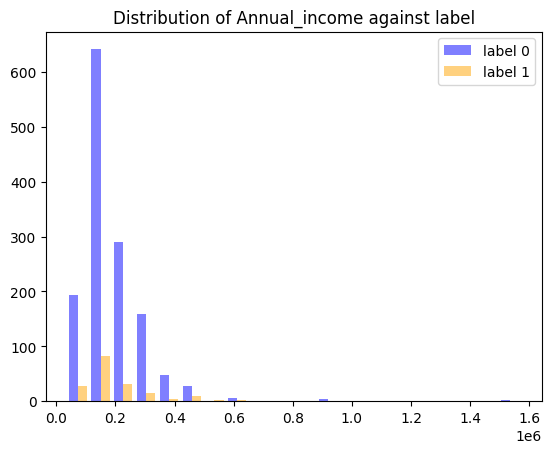

In [88]:
# Histogram for 'Annual_income' with different colors for each label
plt.hist([merged_data[merged_data['label'] == 0]['Annual_income'],
          merged_data[merged_data['label'] == 1]['Annual_income']],
          bins=20, color=['blue', 'orange'], alpha=0.5, label=['label 0', 'label 1'])
plt.title('Distribution of Annual_income against label')
plt.legend()
plt.show()

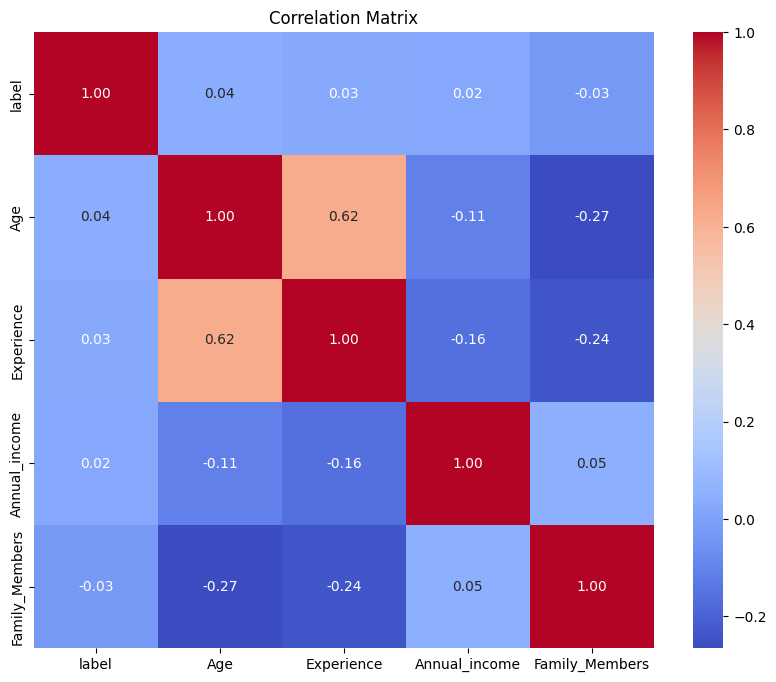

Correlation of 'label' with other columns:
label             1.000000
Age               0.044451
Experience        0.028390
Annual_income     0.024425
Family_Members   -0.030709
Name: label, dtype: float64

Summary of Strong Correlations:
'label' has a correlation of 1.00 with 'label'


In [99]:
# Calculate correlation matrix
correlation_matrix = merged_data[['label', 'Age', 'Experience', 'Annual_income', 'Family_Members']].corr()

# Get correlation of 'label' with other columns
label_correlation = correlation_matrix['label'].sort_values(ascending=False)

# Plotting a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Print the correlation values
print("Correlation of 'label' with other columns:")
print(label_correlation)

# Summary of strong correlations (e.g., absolute correlation greater than 0.3)
strong_correlation = label_correlation[abs(label_correlation) > 0.3]

# Print summary of strong correlations
print("\nSummary of Strong Correlations:")
for column, correlation in strong_correlation.items():
    print(f"'{column}' has a correlation of {correlation:.2f} with 'label'")


In [117]:
from scipy.stats import ttest_ind

income_label_0 = merged_data[merged_data['label'] == 0]['Annual_income']
income_label_1 = merged_data[merged_data['label'] == 1]['Annual_income']

t_stat, p_value = ttest_ind(income_label_0, income_label_1)


In [118]:
print("Income for label 0:")
print(income_label_0.head())

print("\nIncome for label 1:")
print(income_label_1.head())


Income for label 0:
175     81000.0
176    225000.0
177    180000.0
178    135000.0
179    135000.0
Name: Annual_income, dtype: float64

Income for label 1:
0    180000.0
1    315000.0
2    315000.0
3    166500.0
4    315000.0
Name: Annual_income, dtype: float64


In [119]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(income_label_0, income_label_1)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -0.9606540345622575
P-value: 0.3368763675425366


In [120]:
from scipy.stats import ttest_ind

# Extract age data for each label
age_label_0 = merged_data[merged_data['label'] == 0]['Age']
age_label_1 = merged_data[merged_data['label'] == 1]['Age']

# Perform t-test
t_stat_age, p_value_age = ttest_ind(age_label_0, age_label_1)

# Print the results
print("T-statistic:", t_stat_age)
print("P-value:", p_value_age)


T-statistic: -1.7495230357128924
P-value: 0.08039905895998459


In [121]:
from scipy.stats import ttest_ind

# Extract experience data for each label
experience_label_0 = merged_data[merged_data['label'] == 0]['Experience']
experience_label_1 = merged_data[merged_data['label'] == 1]['Experience']

# Perform t-test
t_stat_experience, p_value_experience = ttest_ind(experience_label_0, experience_label_1)

# Print the results
print("T-statistic for Experience:", t_stat_experience)
print("P-value for Experience:", p_value_experience)


T-statistic for Experience: -1.1167232500845914
P-value for Experience: 0.26428619794365327


In [122]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(merged_data['label'], merged_data['Type_Occupation'])

# Perform Chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-squared Statistic:", chi2_stat)
print("P-value:", p_value)


Chi-squared Statistic: 36.56584762842536
P-value: 0.003851575952868713


In [123]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [124]:
# Load the  updated data
merged_data = pd.read_csv('updated_merged_data.csv')

# Drop unnecessary columns
X = merged_data.drop(['Ind_ID', 'label'], axis=1)
y = merged_data['label']

In [125]:
# Encoding the categorical variables
label_encoder = LabelEncoder()
X['GENDER'] = label_encoder.fit_transform(X['GENDER'])
X['Car_Owner'] = label_encoder.fit_transform(X['Car_Owner'])
X['Propert_Owner'] = label_encoder.fit_transform(X['Propert_Owner'])
X['Type_Income'] = label_encoder.fit_transform(X['Type_Income'])
X['EDUCATION'] = label_encoder.fit_transform(X['EDUCATION'])
X['Marital_status'] = label_encoder.fit_transform(X['Marital_status'])
X['Housing_type'] = label_encoder.fit_transform(X['Housing_type'])
X['Phone'] = label_encoder.fit_transform(X['Phone'])
X['EMAIL_ID'] = label_encoder.fit_transform(X['EMAIL_ID'])
X['Type_Occupation'] = label_encoder.fit_transform(X['Type_Occupation'])

In [126]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [127]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [128]:
# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [129]:
# Train and evaluate models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("="*50)

Training Random Forest...

Random Forest Performance:
Accuracy: 0.9419
Confusion Matrix:
[[280   0]
 [ 18  12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       280
           1       1.00      0.40      0.57        30

    accuracy                           0.94       310
   macro avg       0.97      0.70      0.77       310
weighted avg       0.95      0.94      0.93       310

Training Logistic Regression...

Logistic Regression Performance:
Accuracy: 0.9032
Confusion Matrix:
[[280   0]
 [ 30   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       280
           1       0.00      0.00      0.00        30

    accuracy                           0.90       310
   macro avg       0.45      0.50      0.47       310
weighted avg       0.82      0.90      0.86       310

Training Support Vector Machine...

Support Vector Machine Perfo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif


Gradient Boosting Performance:
Accuracy: 0.9161
Confusion Matrix:
[[279   1]
 [ 25   5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       280
           1       0.83      0.17      0.28        30

    accuracy                           0.92       310
   macro avg       0.88      0.58      0.62       310
weighted avg       0.91      0.92      0.89       310



Random Forest:

Accuracy: 94.19%
Precision for label 0: 94%
Precision for label 1: 100%
Recall for label 0: 100%
Recall for label 1: 40%
F1-score for label 0: 97%
F1-score for label 1: 57%

Logistic Regression:

Accuracy: 90.32%
Precision for label 0: 90%
Precision for label 1: 0%
Recall for label 0: 100%
Recall for label 1: 0%
F1-score for label 0: 95%
F1-score for label 1: 0%

Support Vector Machine:

Accuracy: 90.32%
Precision for label 0: 90%
Precision for label 1: 0%
Recall for label 0: 100%
Recall for label 1: 0%
F1-score for label 0: 95%
F1-score for label 1: 0%

Gradient Boosting:

Accuracy: 91.61%
Precision for label 0: 92%
Precision for label 1: 83%
Recall for label 0: 100%
Recall for label 1: 17%
F1-score for label 0: 96%
F1-score for label 1: 28%

In [131]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



In [132]:
# Create the Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)



In [133]:
# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [134]:
# Print the best parameters
print("Best Hyperparameters:", grid_search.best_params_)



Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [136]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model with the best hyperparameters
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred_rf)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.9387096774193548

Confusion Matrix:
[[280   0]
 [ 19  11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       280
           1       1.00      0.37      0.54        30

    accuracy                           0.94       310
   macro avg       0.97      0.68      0.75       310
weighted avg       0.94      0.94      0.93       310

